## The Sparks Foundation - Internship¶

Data Science and Bussines analytics

## TASK-6

## Prediction using Decision Tree Algorithm

Data can be found at https://bit.ly/2G6sYx9

Create the Decision Tree classifier and visualize it graphically.

AUTHOR :- SONAL SINGH

In [1]:
#Importing useful libraries
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing datas
dataset = pd.read_csv("C:/Users/sonal/The Sparks Foundation/Task 6/dataset.txt")

In [3]:
#reading the top datas
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking for null values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#finding description of dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#finding unique data
dataset.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

<AxesSubplot:>

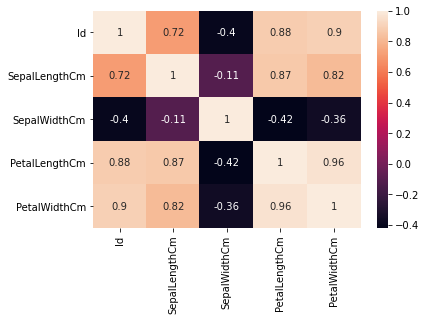

In [7]:
#evaluating the correlation matrix
ds = dataset.corr()
sns.heatmap(ds, xticklabels=ds.columns, yticklabels=ds.columns, annot=True)

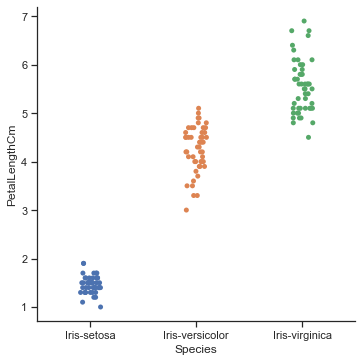

In [8]:
#ploting relationships between categorical data like segment and profit , ship mode and profit , state and profit , etc.
sns.set_theme(style="ticks")
sns.catplot(y="PetalLengthCm",x="Species",data=dataset)

In [9]:
x = dataset.iloc[:,1:4].values
y = dataset.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
y_new = ohe.fit_transform(dataset[['Species']])

In [11]:
df = pd.DataFrame(y_new)
df.rename(columns={0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}, inplace=True)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [12]:
result = pd.concat([dataset,df] ,axis = 1)
result.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [13]:
new_x = result.iloc[:,[1,2,3,4]].values
new_y = result.iloc[:,[5,6,7]].values

In [14]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(new_x , new_y , test_size = 0.2 , random_state= 42)

In [15]:
dataset = dataset.copy()
x = dataset.iloc[:,1:4]
y = dataset.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(112, 3)
(112,)
(38,)
(38, 3)


In [17]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [18]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.90      0.75      0.82        12

       accuracy                           0.89        38
      macro avg       0.90      0.89      0.89        38
   weighted avg       0.90      0.89      0.89        38



In [19]:
print("Training Score: ",clf.score(x_train,y_train))

Training Score:  1.0


In [20]:
print("The Accuracy Score is::",accuracy_score(y_test,y_pred))

The Accuracy Score is:: 0.8947368421052632


In [21]:
print("The Confusion Matrix is::")
print(confusion_matrix(y_test,y_pred))

The Confusion Matrix is::
[[14  0  0]
 [ 0 11  1]
 [ 0  3  9]]


In [22]:
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica


In [23]:
pred=clf.predict(x_test)
print(pred)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica']


In [24]:
print(clf.score(x_test,y_test))

0.8947368421052632


In [25]:
##Lets make predictions on the train dataset
td=clf.predict(x_train)
print(td)

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 

## Let us visualize the Decision Tree to understand it better.

In [26]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


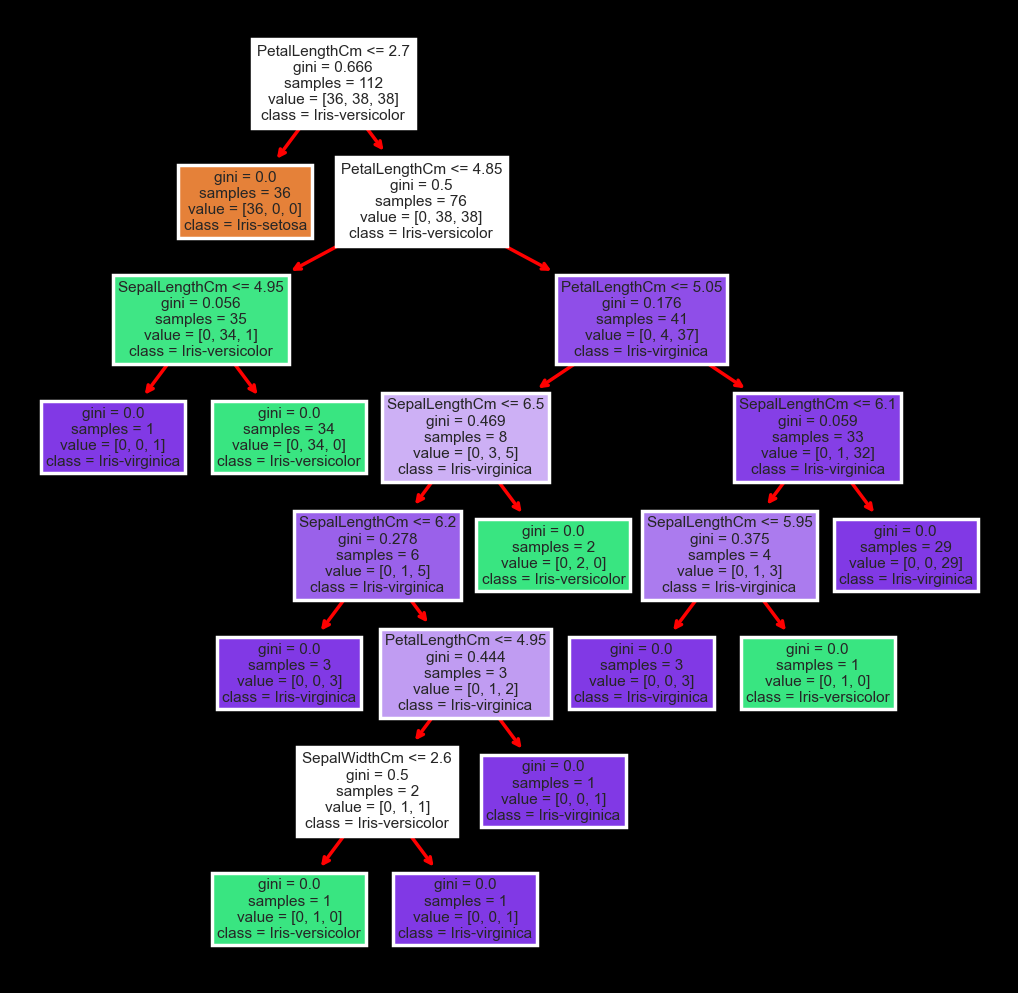

In [27]:
# Import necessary libraries for graph viz
from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='black')
out = tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(1)
fig.savefig('IrisTreeClassifier.png')